<a href="https://colab.research.google.com/github/avarose444/Skin_Cancer_Detection/blob/main/notebooks/SkinCancerRestart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

# Upload kaggle.json (your Kaggle API key)
from google.colab import files
files.upload()  # Upload your kaggle.json here when prompted

# Move kaggle.json to the correct directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d nodoubttome/skin-cancer9-classesisic

# Unzip the dataset
import zipfile
with zipfile.ZipFile("skin-cancer9-classesisic.zip", "r") as zip_ref:
    zip_ref.extractall("skin_cancer_data")

# Confirm it worked
import os
print("Extracted folders:", os.listdir("skin_cancer_data"))

Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/nodoubttome/skin-cancer9-classesisic
License(s): other
skin-cancer9-classesisic.zip: Skipping, found more recently modified local copy (use --force to force download)
Extracted folders: ['Skin cancer ISIC The International Skin Imaging Collaboration']


In [ ]:
!pip install Augmentor
import os
import Augmentor
import os
base_path = "skin_cancer_data/Skin cancer ISIC The International Skin Imaging Collaboration"
train_path = os.path.join(base_path, "Train")
test_path = os.path.join(base_path, "Test")
val_path = os.path.join(base_path, "Validation")

#Directory for when images are augmented through image flipping, random amounts of brightness, zooming, and contrast
augmented_output_dir = '/content/augmented_data/'
os.makedirs(augmented_output_dir, exist_ok=True)

# List class folders to verify
class_names = os.listdir(train_path)
print("Classes found:", class_names)


augmented_output_dir = '/content/augmented_data/'
os.makedirs(augmented_output_dir, exist_ok=True)

# Get class names (subdirectories under 'Train')
class_names = os.listdir(train_path)

def augment_class_images(source_dir, output_dir, num_samples=1000):
    p = Augmentor.Pipeline(source_directory=source_dir, output_directory=output_dir)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.flip_left_right(probability=0.5)
    p.zoom_random(probability=0.5, percentage_area=0.9)
    p.random_brightness(probability=0.5, min_factor=0.7, max_factor=1.3)
    p.random_contrast(probability=0.5, min_factor=0.75, max_factor=1.25)
    p.sample(num_samples)

for class_name in class_names:
    class_input_dir = os.path.join(train_path, class_name)
    class_output_dir = os.path.join(augmented_output_dir, class_name, 'output')
    os.makedirs(class_output_dir, exist_ok=True)

    image_files = [f for f in os.listdir(class_input_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    print(f"Augmenting {class_name} with {len(image_files)} images...")

    augment_class_images(class_input_dir, class_output_dir, num_samples=1000)

Classes found: ['actinic keratosis', 'seborrheic keratosis', 'basal cell carcinoma', 'nevus', 'melanoma', 'dermatofibroma', 'vascular lesion', 'squamous cell carcinoma', 'pigmented benign keratosis']
Augmenting actinic keratosis with 114 images...
Initialised with 114 image(s) found.
Output directory set to /content/augmented_data/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B8A50303DD0>: 100%|██████████| 1000/1000 [00:08<00:00, 122.37 Samples/s]


Augmenting seborrheic keratosis with 77 images...
Initialised with 77 image(s) found.
Output directory set to /content/augmented_data/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7B8A5032EBD0>: 100%|██████████| 1000/1000 [00:16<00:00, 59.63 Samples/s]


Augmenting basal cell carcinoma with 376 images...
Initialised with 376 image(s) found.
Output directory set to /content/augmented_data/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B8A50303750>: 100%|██████████| 1000/1000 [00:06<00:00, 148.34 Samples/s]


Augmenting nevus with 357 images...
Initialised with 357 image(s) found.
Output directory set to /content/augmented_data/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7B8A642E5510>: 100%|██████████| 1000/1000 [00:33<00:00, 29.77 Samples/s]


Augmenting melanoma with 438 images...
Initialised with 438 image(s) found.
Output directory set to /content/augmented_data/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7B8A65022850>: 100%|██████████| 1000/1000 [00:36<00:00, 27.44 Samples/s]


Augmenting dermatofibroma with 95 images...
Initialised with 95 image(s) found.
Output directory set to /content/augmented_data/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B8A50350CD0>: 100%|██████████| 1000/1000 [00:07<00:00, 142.74 Samples/s]


Augmenting vascular lesion with 139 images...
Initialised with 139 image(s) found.
Output directory set to /content/augmented_data/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B8A65013E10>: 100%|██████████| 1000/1000 [00:06<00:00, 151.17 Samples/s]


Augmenting squamous cell carcinoma with 181 images...
Initialised with 181 image(s) found.
Output directory set to /content/augmented_data/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B8A644BE7D0>: 100%|██████████| 1000/1000 [00:06<00:00, 149.21 Samples/s]


Augmenting pigmented benign keratosis with 462 images...
Initialised with 462 image(s) found.
Output directory set to /content/augmented_data/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B8A64309890>: 100%|██████████| 1000/1000 [00:06<00:00, 146.83 Samples/s]


In [ ]:
import os
batch_size = 32
img_height = 180
img_width = 180

import tensorflow as tf
#Preprocessing data
train_ds = tf.keras.utils.image_dataset_from_directory(
    augmented_output_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(180, 180),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    augmented_output_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(180, 180),
    batch_size=32
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=(180, 180),
    batch_size=32
)

Found 18000 files belonging to 9 classes.
Using 14400 files for training.
Found 18000 files belonging to 9 classes.
Using 3600 files for validation.
Found 118 files belonging to 9 classes.


In [ ]:
import numpy as np
from collections import Counter

# Get all labels from the validation set
val_labels = []
for images, labels in val_ds.unbatch():
    val_labels.append(labels.numpy())

# Count the number of samples per class
val_counts = Counter(val_labels)

# Print sorted by class index with class names
for class_index in sorted(val_counts):
    class_name = class_names[class_index]
    print(f"{class_name}: {val_counts[class_index]} samples")

actinic keratosis: 397 samples
seborrheic keratosis: 399 samples
basal cell carcinoma: 410 samples
nevus: 409 samples
melanoma: 399 samples
dermatofibroma: 394 samples
vascular lesion: 399 samples
squamous cell carcinoma: 381 samples
pigmented benign keratosis: 412 samples


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache("/tmp/cache").shuffle(1000).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

num_classes = 9

model = Sequential([
    Rescaling(1.0/255, input_shape=(180, 180, 3)),

    Conv2D(32, 3, padding="same", activation='relu'),
    MaxPool2D(),

    Conv2D(64, 3, padding="same", activation='relu'),
    MaxPool2D(),

    Conv2D(128, 3, padding="same", activation='relu'),
    MaxPool2D(),
    Dropout(0.15),

    Conv2D(256, 3, padding="same", activation='relu'),
    MaxPool2D(),
    Dropout(0.20),

    Conv2D(512, 3, padding="same", activation='relu'),
    MaxPool2D(),
    Dropout(0.25),

    Flatten(),
    Dense(1024, activation="relu"),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


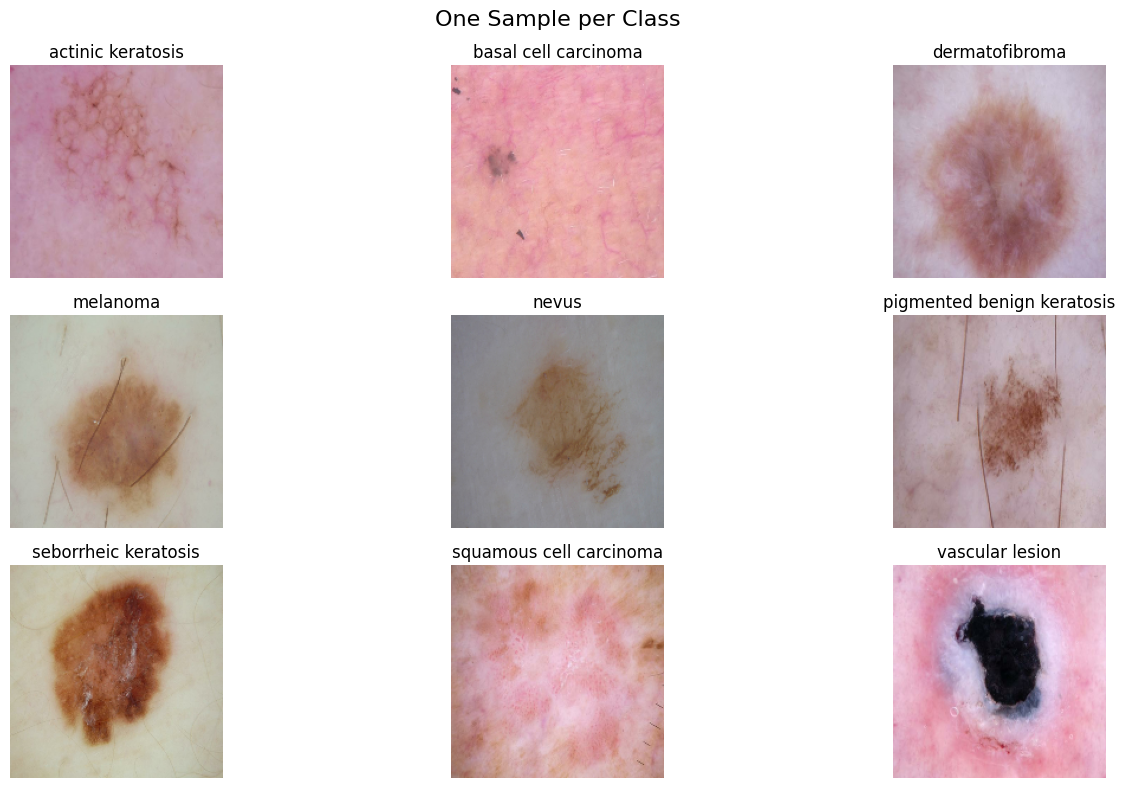

In [ ]:
import matplotlib.pyplot as plt

# Make sure class_names are sorted to match label indices
class_names = sorted(os.listdir(train_path))

# Initialize a dictionary to hold one image per class
class_images = {}
for images, labels in train_ds.unbatch():
    label = labels.numpy()
    if label not in class_images:
        class_images[label] = images.numpy() / 255.0  # Rescale for display
    if len(class_images) == len(class_names):
        break

# Plot one image per class
plt.figure(figsize=(15, 8))
for i, label in enumerate(sorted(class_images)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(class_images[label])
    plt.title(f"{class_names[label]}")
    plt.axis("off")
plt.suptitle("One Sample per Class", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

opt = Adam(learning_rate=5e-4)

model.compile(
    optimizer=opt,
    loss=SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Train it
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/25
221/450 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1465 - loss: 2.1504

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


450/450 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.1791 - loss: 2.0657 - val_accuracy: 0.3428 - val_loss: 1.7109 - learning_rate: 5.0000e-04
Epoch 2/25
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3782 - loss: 1.5667 - val_accuracy: 0.4111 - val_loss: 1.4798 - learning_rate: 5.0000e-04
Epoch 3/25
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4337 - loss: 1.4287 - val_accuracy: 0.4553 - val_loss: 1.3658 - learning_rate: 5.0000e-04
Epoch 4/25
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4825 - loss: 1.3487 - val_accuracy: 0.4931 - val_loss: 1.3514 - learning_rate: 5.0000e-04
Epoch 5/25
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5130 - loss: 1.2681 - val_accuracy: 0.5475 - val_loss: 1.2037 - learning_rate: 5.0000e-04
Epoch 6/25
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5417 - loss: 1.1919 - val_accuracy: 0.5517 - val_loss: 1.1749 - learning_rate: 5.0000e-04
Epoch 7/25
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5675 - 

In [ ]:
import numpy as np
from collections import defaultdict

# Initialize
true_labels = []
pred_labels = []

# Collect predictions and labels
for images, labels in val_ds:
    preds = model.predict(images)
    pred_classes = np.argmax(preds, axis=1)

    true_labels.extend(labels.numpy())
    pred_labels.extend(pred_classes)

# Convert to numpy arrays
true_labels = np.array(true_labels)
pred_labels = np.array(pred_labels)

# Compute per-class accuracy
class_accuracies = {}
for class_idx in range(num_classes):
    class_mask = true_labels == class_idx
    correct_preds = np.sum(pred_labels[class_mask] == true_labels[class_mask])
    total_preds = np.sum(class_mask)
    accuracy = correct_preds / total_preds if total_preds > 0 else 0
    class_accuracies[class_idx] = accuracy

# Print results with class names
for class_idx, acc in class_accuracies.items():
    class_name = class_names[class_idx]
    print(f"Class {class_idx} ({class_name}) Accuracy: {acc:.2%}")

In [ ]:
model.save('my_model.keras')

In [ ]:
# from tensorflow import keras
# model = keras.models.load_model('my_model.keras')


---
**Adversarial Attack**

*Conducting an adversarial attack on validation data. We will then demonstrate that the validation accuracy worsens for our baseline model that is not trained on these slightly different images.*



In [ ]:
import os
import tensorflow as tf
import numpy as np
from tqdm import tqdm
from PIL import Image

# Output directories
val_clean_dir = "saved_val_clean"
val_adv_dir = "saved_val_adv"
os.makedirs(val_clean_dir, exist_ok=True)
os.makedirs(val_adv_dir, exist_ok=True)

#Spatial transform function
def random_spatial_transform(img):
    img = tf.image.random_flip_left_right(img)
    img = tf.image.rot90(img, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    img = tf.image.random_brightness(img, max_delta=0.2)
    dx = tf.random.uniform([], -10, 10, dtype=tf.int32)
    dy = tf.random.uniform([], -10, 10, dtype=tf.int32)
    img = tf.roll(img, shift=[dy, dx], axis=[0, 1])
    img = tf.clip_by_value(img, 0.0, 255.0)
    return tf.cast(img, tf.float32)

#Worst-of-N adversarial attack generation
def generate_worst_case_batch(images, labels, model, N=10):
    worst_images = []
    new_labels = []
    for i in range(len(images)):
        original_img = images[i]
        label = int(labels[i].numpy())
        min_confidence = 1.0
        worst_img = original_img
        for _ in range(N):
            transformed = random_spatial_transform(original_img)
            transformed = tf.expand_dims(transformed, axis=0)
            pred = model(transformed, training=False)
            pred = tf.squeeze(pred, axis=0)
            confidence = pred[label].numpy()
            if confidence < min_confidence:
                min_confidence = confidence
                worst_img = transformed[0]
        worst_images.append(worst_img)
        new_labels.append(label)
    return tf.stack(worst_images), tf.constant(new_labels)

def save_image(img_tensor, filepath):
    img = tf.clip_by_value(img_tensor, 0, 255)
    img = tf.cast(img, tf.uint8)
    Image.fromarray(img.numpy()).save(filepath)

class_names = sorted(os.listdir(train_path))

#Save clean + adversarial validation images
val_batches = list(val_ds)
for batch_idx, (images, labels) in tqdm(enumerate(val_batches), total=len(val_batches), desc="Saving clean + adversarial val images"):
    images = tf.cast(images, tf.float32)

    # Save clean images
    for i, (img, label) in enumerate(zip(images, labels)):
        class_name = class_names[int(label.numpy())]
        save_dir = os.path.join(val_clean_dir, class_name)
        os.makedirs(save_dir, exist_ok=True)
        save_image(img, os.path.join(save_dir, f"clean_{batch_idx}_{i}.jpg"))

    # Save adversarial images
    adv_images, _ = generate_worst_case_batch(images, labels, model)
    for i, (adv_img, label) in enumerate(zip(adv_images, labels)):
        class_name = class_names[int(label.numpy())]
        save_dir = os.path.join(val_adv_dir, class_name)
        os.makedirs(save_dir, exist_ok=True)
        save_image(adv_img, os.path.join(save_dir, f"adv_{batch_idx}_{i}.jpg"))


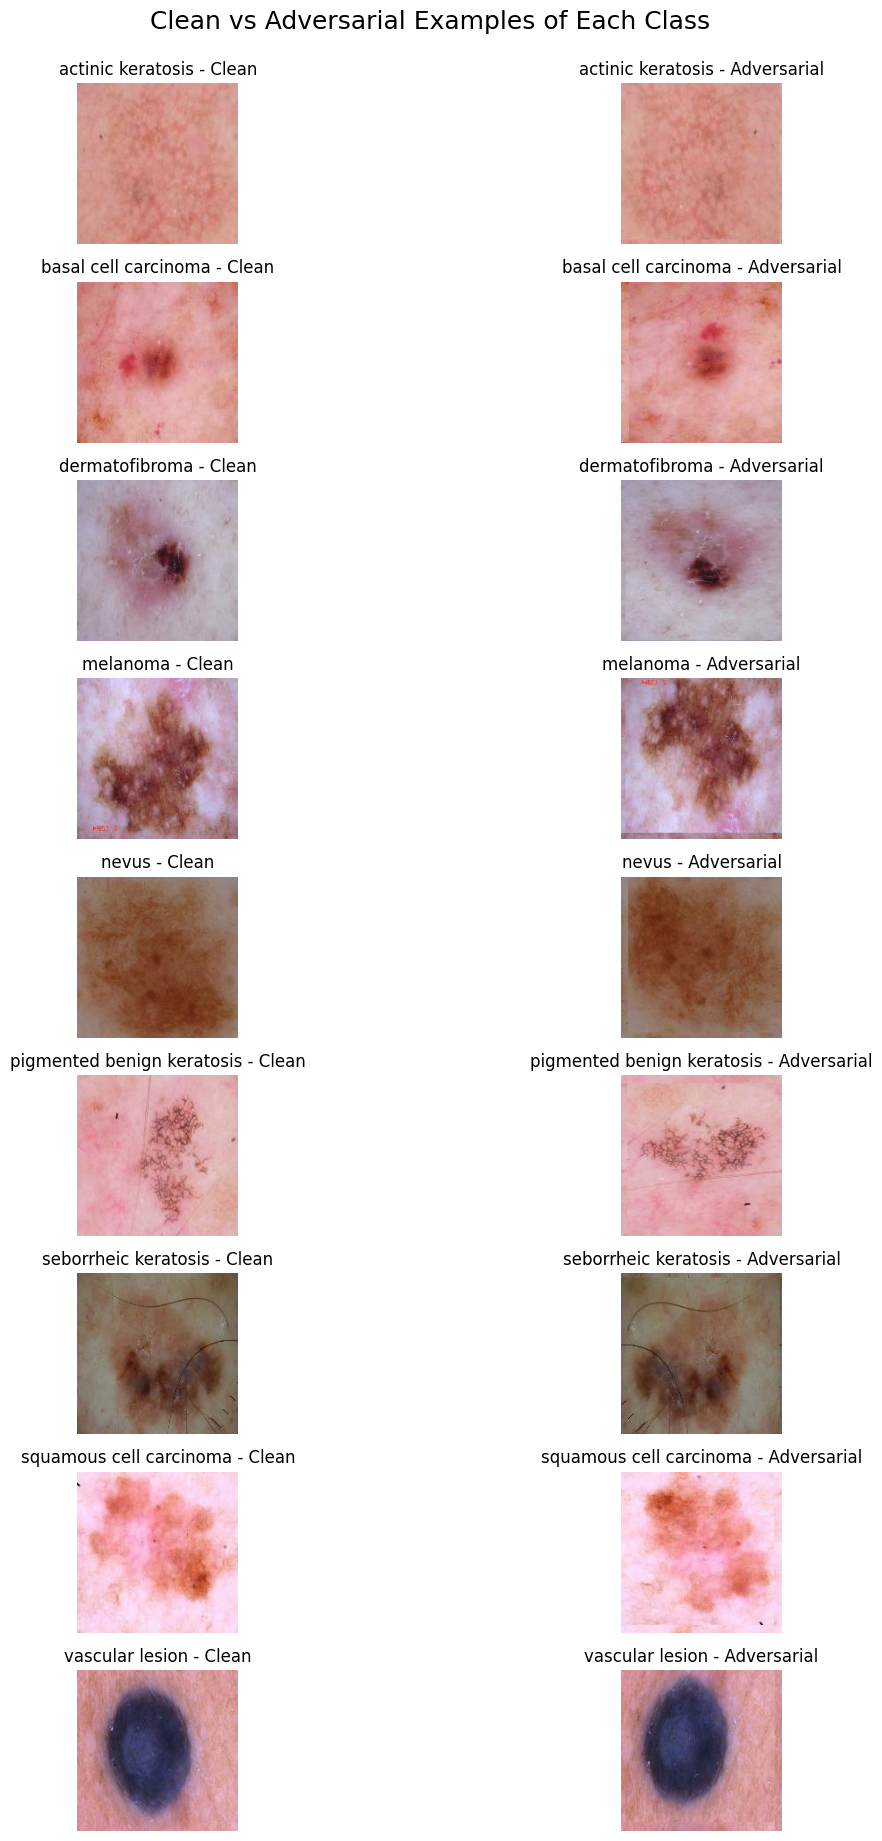

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

# Paths
clean_dir = "saved_val_clean"
adv_dir = "saved_val_adv"

# Sorted class names
class_names = sorted(os.listdir(clean_dir))

# Number of classes
num_classes = len(class_names)

# Prepare figure
plt.figure(figsize=(15, num_classes * 2))

for i, class_name in enumerate(class_names):
    # Load one clean image
    clean_path = os.path.join(clean_dir, class_name)
    clean_img_files = sorted(os.listdir(clean_path))
    clean_img = Image.open(os.path.join(clean_path, clean_img_files[0])).convert("RGB")
    clean_img = np.array(clean_img).astype(np.float32) / 255.0

    # Load corresponding adversarial image
    adv_path = os.path.join(adv_dir, class_name)
    adv_img_files = sorted(os.listdir(adv_path))
    adv_img = Image.open(os.path.join(adv_path, adv_img_files[0])).convert("RGB")
    adv_img = np.array(adv_img).astype(np.float32) / 255.0

    # Show clean image
    plt.subplot(num_classes, 2, 2*i + 1)
    plt.imshow(clean_img)
    plt.title(f"{class_name} - Clean")
    plt.axis("off")

    # Show adversarial image
    plt.subplot(num_classes, 2, 2*i + 2)
    plt.imshow(adv_img)
    plt.title(f"{class_name} - Adversarial")
    plt.axis("off")

plt.tight_layout()
plt.suptitle("Clean vs Adversarial Examples of Each Class", fontsize=18, y=1.02)
plt.show()



**Evaluating Original Model on Accuracy with Adversarial Attack**

In [ ]:
import tensorflow as tf
import os

val_clean_ds = tf.keras.utils.image_dataset_from_directory(
    "saved_val_clean",
    image_size=(180, 180),
    batch_size=32,
    shuffle=False
)

val_adv_ds = tf.keras.utils.image_dataset_from_directory(
    "saved_val_adv",
    image_size=(180, 180),
    batch_size=32,
    shuffle=False
)

class_names = sorted(os.listdir("saved_val_clean"))

import numpy as np

def evaluate_per_class_accuracy(model, dataset, class_names):
    true_labels = []
    pred_labels = []

    for images, labels in dataset:
        preds = model.predict(images, verbose=0)
        preds = tf.argmax(preds, axis=1)
        true_labels.extend(labels.numpy())
        pred_labels.extend(preds.numpy())

    true_labels = np.array(true_labels)
    pred_labels = np.array(pred_labels)

    per_class_acc = {}
    for i, name in enumerate(class_names):
        mask = true_labels == i
        correct = np.sum(pred_labels[mask] == true_labels[mask])
        total = np.sum(mask)
        acc = correct / total if total > 0 else 0
        per_class_acc[name] = acc

    return per_class_acc

# Evaluate the original model (model) on clean and adversarial test sets
clean_per_class_model1 = evaluate_per_class_accuracy(model, val_clean_ds, class_names)
adv_per_class_model1 = evaluate_per_class_accuracy(model, val_adv_ds, class_names)

print("Per-Class Accuracy Comparison for Original Model (model):\n")
for class_name in class_names:
    clean_acc = clean_per_class_model1.get(class_name, 0)
    adv_acc = adv_per_class_model1.get(class_name, 0)
    print(f"{class_name:<30} Clean = {clean_acc:.2%} | Adversarial = {adv_acc:.2%}")

**Re-Training the Model on Adversarial Attack Images**

In [ ]:
import os
import tensorflow as tf
import numpy as np
from tqdm import tqdm
from PIL import Image

# Store new training data
output_dir = "augmented_train_dir"
os.makedirs(output_dir, exist_ok=True)

# Reuse this
def random_spatial_transform(img):
    img = tf.image.random_flip_left_right(img)
    img = tf.image.rot90(img, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    img = tf.image.random_brightness(img, max_delta=0.2)
    dx = tf.random.uniform([], -10, 10, dtype=tf.int32)
    dy = tf.random.uniform([], -10, 10, dtype=tf.int32)
    img = tf.roll(img, shift=[dy, dx], axis=[0, 1])
    img = tf.clip_by_value(img, 0, 255)
    return tf.cast(img, tf.float32)

def generate_worst_case_batch(images, labels, model, N=10):
    worst_images = []
    for i in range(len(images)):
        original_img = images[i]
        label = int(labels[i].numpy())
        min_confidence = 1.0
        worst_img = original_img
        for _ in range(N):
            transformed = random_spatial_transform(original_img)
            transformed = tf.expand_dims(transformed, axis=0)
            pred = model(transformed, training=False)[0]
            confidence = pred[label]
            if confidence < min_confidence:
                min_confidence = confidence
                worst_img = transformed[0]
        worst_images.append(worst_img)
    return tf.stack(worst_images)

# Load class names to map labels to folder names
class_names = sorted(os.listdir(train_path))

# Loop over batches
for batch_idx, (images, labels) in tqdm(enumerate(train_ds), total=len(train_ds), desc="Generating adversarial training data"):
    images = tf.cast(images, tf.float32)

    # Save clean images
    for i, (img, label) in enumerate(zip(images, labels)):
        class_name = class_names[int(label.numpy())]
        class_dir = os.path.join(output_dir, class_name)
        os.makedirs(class_dir, exist_ok=True)
        img_uint8 = tf.cast(tf.clip_by_value(img, 0, 255), tf.uint8)
        img_pil = Image.fromarray(img_uint8.numpy())
        img_pil.save(os.path.join(class_dir, f"clean_{batch_idx}_{i}.jpg"))

    # Generate and save adversarial images
    adv_images = generate_worst_case_batch(images, labels, model)
    for i, (adv_img, label) in enumerate(zip(adv_images, labels)):
        class_name = class_names[int(label.numpy())]
        class_dir = os.path.join(output_dir, class_name)
        os.makedirs(class_dir, exist_ok=True)
        adv_uint8 = tf.cast(tf.clip_by_value(adv_img, 0, 255), tf.uint8)
        adv_pil = Image.fromarray(adv_uint8.numpy())
        adv_pil.save(os.path.join(class_dir, f"adv_{batch_idx}_{i}.jpg"))


Generating adversarial training data:  50%|█████     | 225/450 [24:49<24:49,  6.62s/it]


**New Model (to be trained on adversarial data)**

In [ ]:
#Retrieving the data

val_clean_ds = tf.keras.utils.image_dataset_from_directory(
    "saved_val_clean",
    image_size=(180, 180),
    batch_size=32,
    shuffle=False
)

val_adv_ds = tf.keras.utils.image_dataset_from_directory(
    "saved_val_adv",
    image_size=(180, 180),
    batch_size=32,
    shuffle=False
)

train_ds = tf.keras.utils.image_dataset_from_directory(
    "augmented_train_dir",
    image_size=(180, 180),
    batch_size=32,
    shuffle=True
)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

num_classes = 9

model2 = Sequential([
    Rescaling(1.0/255, input_shape=(180, 180, 3)),

    Conv2D(32, 3, padding="same", activation='relu'),
    MaxPool2D(),

    Conv2D(64, 3, padding="same", activation='relu'),
    MaxPool2D(),

    Conv2D(128, 3, padding="same", activation='relu'),
    MaxPool2D(),
    Dropout(0.15),

    Conv2D(256, 3, padding="same", activation='relu'),
    MaxPool2D(),
    Dropout(0.20),

    Conv2D(512, 3, padding="same", activation='relu'),
    MaxPool2D(),
    Dropout(0.25),

    Flatten(),
    Dense(1024, activation="relu"),
    Dense(num_classes, activation='softmax')
])

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

opt = Adam(learning_rate=5e-4)

model2.compile(
    optimizer=opt,
    loss=SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Train it
history = model2.fit(
    train_ds,
    validation_data=val_clean_ds,
    epochs=25,
    callbacks=[early_stop, reduce_lr]
)

In [ ]:
# Evaluate on clean test set
clean_loss, clean_acc = model2.evaluate(val_clean_ds)
print(f"Clean Accuracy: {clean_acc:.2%}")

# Evaluate on adversarial test set
adv_loss, adv_acc = model2.evaluate(val_adv_ds)
print(f"Adversarial Accuracy: {adv_acc:.2%}")


Class Name                   Model1 Clean      Model1 Adv    Model2 Clean      Model2 Adv
-------------------------------------------------------------------------------------
actinic keratosis                 89.17%          6.46%         90.23%         82.37%
basal cell carcinoma              80.70%         22.77%         86.00%         78.75%
dermatofibroma                    95.37%         15.37%         98.48%         95.78%
melanoma                          75.79%         22.32%         74.45%         69.68%
nevus                             78.70%         34.49%         79.20%         74.18%
pigmented benign keratosis         83.76%         28.90%         85.11%         81.21%
seborrheic keratosis              86.72%         10.54%         87.17%         92.62%
squamous cell carcinoma           93.18%         12.98%         89.65%         85.61%
vascular lesion                   98.79%         77.04%         99.48%         99.48%


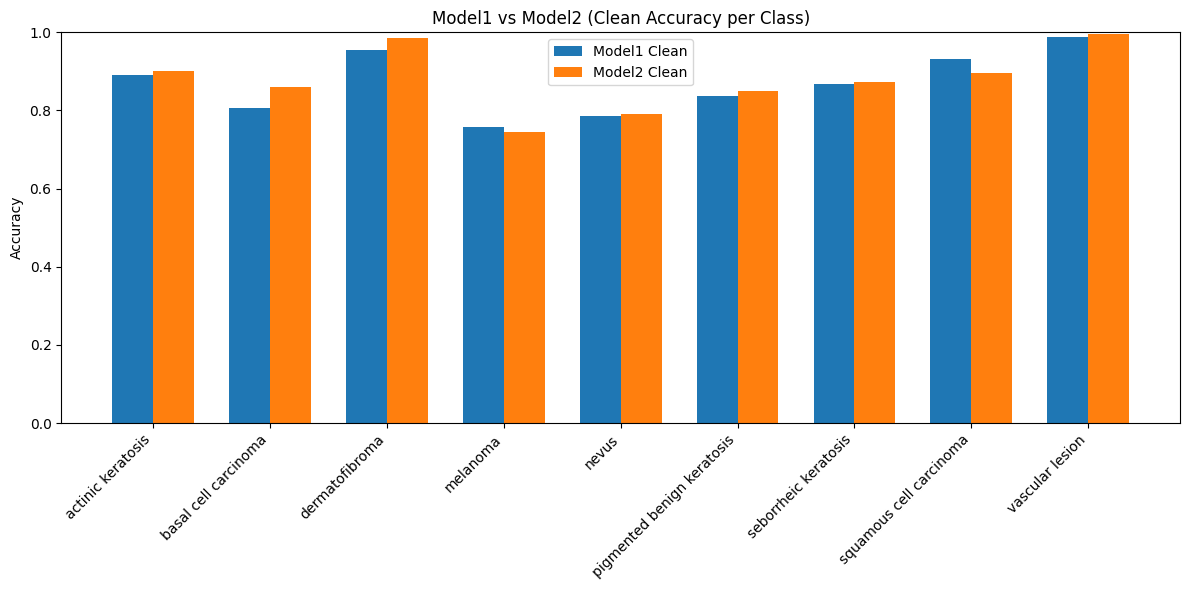

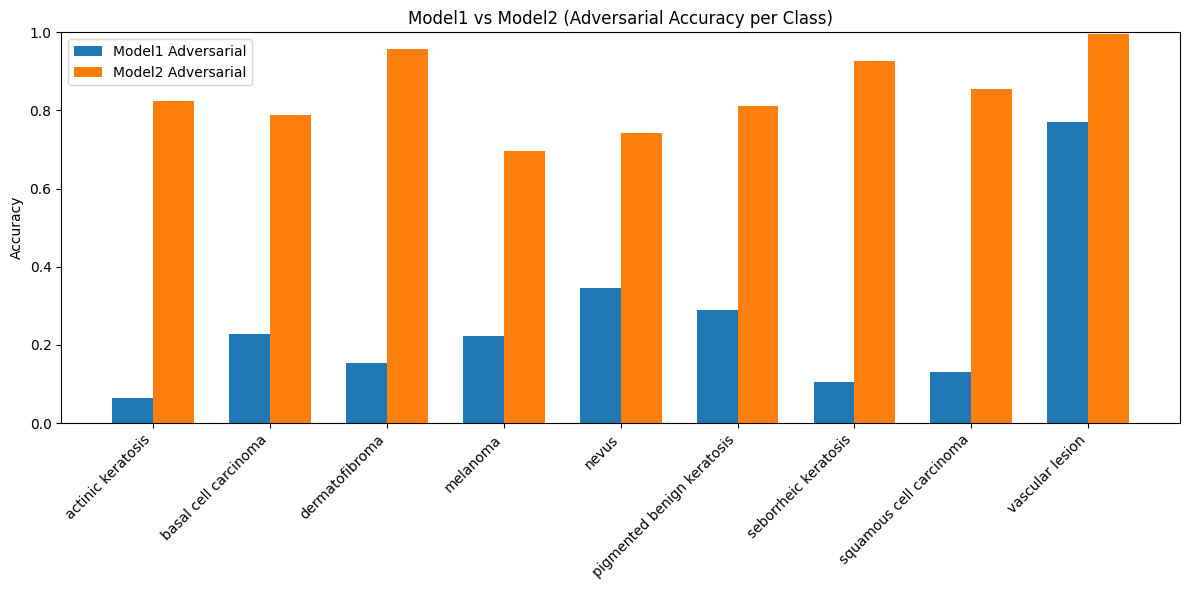

In [ ]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt

def evaluate_per_class_accuracy(model, dataset, class_names):
    true_labels = []
    pred_labels = []

    for images, labels in dataset:
        preds = model.predict(images, verbose=0)
        preds = tf.argmax(preds, axis=1)
        true_labels.extend(labels.numpy())
        pred_labels.extend(preds.numpy())

    true_labels = np.array(true_labels)
    pred_labels = np.array(pred_labels)

    per_class_acc = {}
    for i, name in enumerate(class_names):
        mask = true_labels == i
        correct = np.sum(pred_labels[mask] == true_labels[mask])
        total = np.sum(mask)
        acc = correct / total if total > 0 else 0
        per_class_acc[name] = acc

    return per_class_acc

class_names = sorted(os.listdir("saved_val_clean"))

# Evaluate
clean_per_class = evaluate_per_class_accuracy(model2, val_clean_ds, class_names)
adv_per_class = evaluate_per_class_accuracy(model2, val_adv_ds, class_names)
original_per_class_clean = evaluate_per_class_accuracy(model, val_ds, class_names)
original_per_class_adv = evaluate_per_class_accuracy(model, val_adv_ds, class_names)

# Results table
print(f"{'Class Name':<25} {'Model1 Clean':>15} {'Model1 Adv':>15} {'Model2 Clean':>15} {'Model2 Adv':>15}")
print("-" * 85)

model1_clean = []
model2_clean = []
model2_adv = []

for class_name in class_names:
    orig_acc = original_per_class_clean.get(class_name, 0)
    orig_acc_adv = original_per_class_adv.get(class_name, 0)
    clean_acc = clean_per_class.get(class_name, 0)
    adv_acc = adv_per_class.get(class_name, 0)

    print(f"{class_name:<25} {orig_acc:>14.2%} {orig_acc_adv:>14.2%} {clean_acc:>14.2%} {adv_acc:>14.2%}")

    model1_clean.append(orig_acc)
    model2_clean.append(clean_acc)
    model2_adv.append(adv_acc)

# Model1 Clean vs Model2 Clean
x = np.arange(len(class_names))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, model1_clean, width=width, label='Model1 Clean')
plt.bar(x + width/2, model2_clean, width=width, label='Model2 Clean')
plt.xticks(x, class_names, rotation=45, ha="right")
plt.ylabel("Accuracy")
plt.title("Model1 vs Model2 (Clean Accuracy per Class)")
plt.ylim(0, 1.0)
plt.legend()
plt.tight_layout()
plt.show()

# Model1 Adversarial vs Model2 Adversarial
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, original_per_class_adv.values(), width=width, label='Model1 Adversarial')
plt.bar(x + width/2, adv_per_class.values(), width=width, label='Model2 Adversarial')
plt.xticks(x, class_names, rotation=45, ha="right")
plt.ylabel("Accuracy")
plt.title("Model1 vs Model2 (Adversarial Accuracy per Class)")
plt.ylim(0, 1.0)
plt.legend()
plt.tight_layout()
plt.show()